# Data Cleaning
Input: 6 datasets - account, transaction, app, in-app, device & category reference <br>

Output: 
1. Transaction data joined with account, app, in-app
2. App data joined with in-app (aggregated), device, category

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation

%matplotlib inline 
sns.set(color_codes=True)

### Account Data

In [20]:
act = pd.read_csv('account_dat.csv')
act.create_dt = pd.to_datetime(act['create_dt'])
print(act.shape)
act.head()

(100000, 3)


,acct_id,create_dt,payment_type
0,eb23e449d274bddb,2012-04-03,PMOF
1,3d60dcb8494a0d70,2009-08-31,PMOF
2,9b6d6fbf76504d85,2008-11-06,PMOF
3,343255370828b380,2012-01-03,PMOF
4,664e27f05189c387,2010-10-31,PMOF


In [22]:
# Change create date to account create date due to the same field name is used in transaction data
act = act.rename(columns = {'create_dt':'acct_create_dt'})

<AxesSubplot:xlabel='acct_create_dt'>

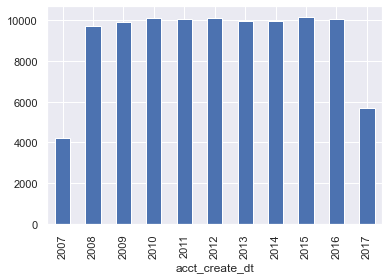

In [23]:
# Explore the frequency of account create date
act.payment_type.groupby(act['acct_create_dt'].dt.year).count().plot(kind="bar")

### App data, category & device

In [24]:
# Join app data with category and device reference
app = pd.read_csv('app_dat.csv')
cate = pd.read_csv('category_ref.csv')
dev = pd.read_csv('device_ref.csv')

app = pd.merge(app, cate, on = 'category_id')
app = pd.merge(app, dev, on = 'device_id')
app.head()

,app_name,content_id,category_id,device_id,category_name,device_name
0,half-slouched having,22dfac9721b899cb,Y-8,3,Photos & Videos,Both
1,That Zoology,6473dd29a2badbf1,Y-8,3,Photos & Videos,Both
2,careful!--come stubbornly,ee013dcbf9ecc2b1,Y-8,3,Photos & Videos,Both
3,Bang background,1c85ae3c9505ff55,Y-8,3,Photos & Videos,Both
4,tides multitudinously,83f2675cd07166c3,Y-8,3,Photos & Videos,Both


In [27]:
# Rename columns
app.info()
app = app.rename(columns = {'content_id':'parent_app_content_id','device_id':'app_device_id',
                           'device_name':'app_device_name'})

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   app_name               1000 non-null   object
 1   parent_app_content_id  1000 non-null   object
 2   category_id            1000 non-null   object
 3   app_device_id          1000 non-null   int64 
 4   category_name          1000 non-null   object
 5   app_device_name        1000 non-null   object
dtypes: int64(1), object(5)
memory usage: 54.7+ KB


In [29]:
# Understand value counts of app, app category, device 
print(app.parent_app_content_id.nunique())
print('----- Category -----------------')
print(app.category_name.value_counts())
print('----- Device -----------------')
print(app.app_device_name.value_counts())

1000
----- Category -----------------
Games                392
Photos & Videos      260
Utilities            153
Entertainment        149
Social Networking     46
Name: category_name, dtype: int64
----- Device -----------------
Both      815
iPad       97
iPhone     88
Name: app_device_name, dtype: int64


### In-App data

In [31]:
inapp = pd.read_csv('in-app_dat.csv')
print(inapp.shape)
inapp.head()

(2376, 3)


,parent_app_content_id,content_id,type
0,d2bde35599e0dae9,227227a77c59809b,consumable
1,d2bde35599e0dae9,41ac2362a2600185,consumable
2,d2bde35599e0dae9,64a8e16f030bb611,consumable
3,d2bde35599e0dae9,2c8ba424183afa7c,consumable
4,d2bde35599e0dae9,b4c42fa5cc420f7b,consumable


In [40]:
# Understand value counts of app, in app content_id, type 
print(inapp.parent_app_content_id.nunique())
print('----- In-App Content -----------------')
print(inapp.content_id.nunique())
print('----- In-app Purchase Type -----------------')
print(inapp.type.value_counts())

476
----- In-App Content -----------------
2376
----- In-app Purchase Type -----------------
consumable      2107
subscription     269
Name: type, dtype: int64


### Transaction Data

In [76]:
trans = pd.read_csv('transaction_dat.csv')
trans.create_dt = pd.to_datetime(trans['create_dt'])
print(trans.shape)
trans.head()

(3607509, 5)


,create_dt,content_id,acct_id,price,device_id
0,2016-08-28,b6cf4f33e7455df4,220574a7a6a71afa,11.99,1
1,2016-09-16,71ac3e9c38ddbbba,8551f69a5015ea6a,1.99,2
2,2016-08-15,776b851b916c33d1,7dedf309494a1966,0.99,2
3,2016-06-17,7a47ca132a8dc695,7174a81c796dcf7e,1.99,2
4,2016-06-13,30581219bc952dbb,35aaf59d64a677e7,11.99,2


In [35]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3607509 entries, 0 to 3607508
Data columns (total 5 columns):
 #   Column      Dtype         
---  ------      -----         
 0   create_dt   datetime64[ns]
 1   content_id  object        
 2   acct_id     object        
 3   price       float64       
 4   device_id   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 137.6+ MB


<AxesSubplot:xlabel='price'>

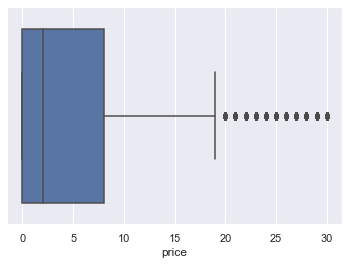

In [38]:
# Understand the price distribution
sns.boxplot(x=trans.price)

<AxesSubplot:xlabel='price'>

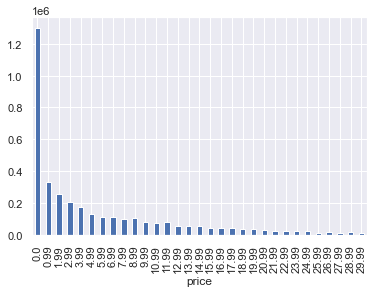

In [39]:
# Explore the frequency of transactions at different prices
trans.acct_id.groupby(trans.price).count().plot(kind="bar")

The maximum of transaction date:  2016-09-21 00:00:00
The minimum of transaction date:  2016-06-01 00:00:00


<AxesSubplot:xlabel='create_dt'>

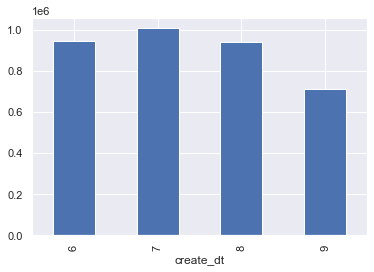

In [42]:
#The min & max transaction date
print('The maximum of transaction date: ', max(trans.create_dt)) #Finding: Sep does not have full month volume
print('The minimum of transaction date: ', min(trans.create_dt))

# Explore the frequency of transaction month
trans.acct_id.groupby(trans.create_dt.dt.month).count().plot(kind="bar")

#### Finding 1: some accounts are not in the account table

In [77]:
# Join transaction data with account data
print('Unique account_id w/ transactions: ', trans.acct_id.nunique())
trans = pd.merge(act, trans, on = 'acct_id')
print('Unique account_id after join: ',trans.acct_id.nunique()) #Finding: 25 accounts are not in the account table


Unique account_id w/ transactions:  30000
Unique account_id after join:  29975


In [52]:
trans.head()

,acct_id,acct_create_dt,payment_type,create_dt,content_id,price,device_id
0,9b6d6fbf76504d85,2008-11-06,PMOF,2016-08-29,a013e9d8a77241b8,11.99,1
1,9b6d6fbf76504d85,2008-11-06,PMOF,2016-07-23,470b6fed814e5e36,26.99,1
2,9b6d6fbf76504d85,2008-11-06,PMOF,2016-09-10,ef5fd462c23f239d,17.99,1
3,9b6d6fbf76504d85,2008-11-06,PMOF,2016-09-06,dea0fb807a190267,1.99,2
4,9b6d6fbf76504d85,2008-11-06,PMOF,2016-07-06,a55ed89700affd0f,17.99,1


#### Finding 2: some transactions were made before accounts were created

In [80]:
# Confirm all transactions were made after accounts were created

test = trans.loc[:,['acct_id','acct_create_dt','create_dt']].groupby('acct_id')['acct_create_dt','create_dt'].min()
test.loc[:,'Check']=0
test.loc[test.create_dt < test.acct_create_dt, 'Check'] = 1


print(test.Check.value_counts()) #233,420 transactions happened earlier. 3,487 users
test = test.loc[test.Check ==1,:].reset_index()
test = test.drop(['acct_create_dt','create_dt','Check'], axis = 1)

C:\Users\steve\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


0    26488
1     3487
Name: Check, dtype: int64


In [82]:
# Exclude transactions from the ones that happened before acct was created
print(trans.acct_id.nunique())
trans = pd.merge(trans, test, on = 'acct_id', how = 'outer', indicator = True).query('_merge == "left_only"')
print('After left join: ',trans.acct_id.nunique()) # Drop 3,487 accounts

29975
After left join:  26488


In [83]:
trans.head()

,acct_id,acct_create_dt,payment_type,create_dt,content_id,price,device_id,_merge
0,9b6d6fbf76504d85,2008-11-06,PMOF,2016-08-29,a013e9d8a77241b8,11.99,1,left_only
1,9b6d6fbf76504d85,2008-11-06,PMOF,2016-07-23,470b6fed814e5e36,26.99,1,left_only
2,9b6d6fbf76504d85,2008-11-06,PMOF,2016-09-10,ef5fd462c23f239d,17.99,1,left_only
3,9b6d6fbf76504d85,2008-11-06,PMOF,2016-09-06,dea0fb807a190267,1.99,2,left_only
4,9b6d6fbf76504d85,2008-11-06,PMOF,2016-07-06,a55ed89700affd0f,17.99,1,left_only


#### Finding 3: some transaction records are duplicated

In [84]:
# Check for duplicated records
print(trans.shape)
duplicate_rows_df = trans[trans.duplicated()]
print('number of duplicate rows: ', duplicate_rows_df.shape) #3900 duplicated records

trans = trans.drop_duplicates()
print('After dropping duplicates: ',trans.shape)

(3333699, 8)
number of duplicate rows:  (1952, 8)
After dropping duplicates:  (3331747, 8)


#### Finding 4: about 150 users have high numbers of transactions

In [85]:
df = trans.groupby('acct_id')['create_dt'].count().sort_values().reset_index()
df.describe()

,create_dt
count,26488.000000
mean,125.783260
std,97.560791
min,46.000000
25%,79.000000
50%,137.000000
75%,153.000000
max,1353.000000


(array([ 3.,  9., 26., 28., 20., 29., 18., 13.,  1.,  3.]),
 array([1289. , 1295.4, 1301.8, 1308.2, 1314.6, 1321. , 1327.4, 1333.8,
        1340.2, 1346.6, 1353. ]),
 <BarContainer object of 10 artists>)

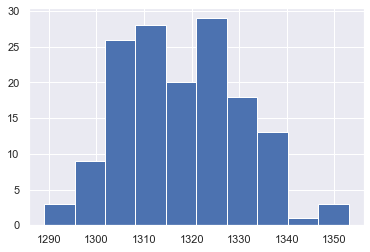

In [87]:
# The distribution of users w/ over 1K transactions
df1 = df[df['create_dt'] > 1000]
plt.hist(df1.create_dt)

#### Finding 5: content id can be parent_app_content_id or in-app content_id

In [90]:
trans = trans.drop(['_merge'], axis = 1)
print(trans.shape)
trans.head()

(3331747, 7)


,acct_id,acct_create_dt,payment_type,create_dt,content_id,price,device_id
0,9b6d6fbf76504d85,2008-11-06,PMOF,2016-08-29,a013e9d8a77241b8,11.99,1
1,9b6d6fbf76504d85,2008-11-06,PMOF,2016-07-23,470b6fed814e5e36,26.99,1
2,9b6d6fbf76504d85,2008-11-06,PMOF,2016-09-10,ef5fd462c23f239d,17.99,1
3,9b6d6fbf76504d85,2008-11-06,PMOF,2016-09-06,dea0fb807a190267,1.99,2
4,9b6d6fbf76504d85,2008-11-06,PMOF,2016-07-06,a55ed89700affd0f,17.99,1


In [91]:
# Join clean transaction data with in-app
df = pd.merge(trans, inapp, on = 'content_id', how = 'outer', indicator = True)
print(df.shape)

# Review merge results
df._merge.value_counts()

(3331747, 10)


both          2010984
left_only     1320763
right_only          0
Name: _merge, dtype: int64

In [92]:
# Seperate trans into two dataframe for join purpose

df1 = df.loc[df._merge == 'both',:].drop('_merge', axis = 1)
print(df1.shape)

df2 = df.loc[df._merge == 'left_only',:].drop('_merge', axis = 1)
print(df2.shape)

(2010984, 9)
(1320763, 9)


In [93]:
# First dataframe joins with app data on parent_app_content_id -> these are in-app purchase history
df1 = pd.merge(df1, app, on = 'parent_app_content_id', how = 'left', indicator = True)
df1.shape
df1._merge.value_counts()

both          2010984
left_only           0
right_only          0
Name: _merge, dtype: int64

In [94]:
# Second dataframe joins with app data with content_id
df2 = pd.merge(df2, app, left_on = 'content_id', right_on= 'parent_app_content_id', how = 'left', indicator = True)
df2.shape
df2._merge.value_counts()

both          1320763
left_only           0
right_only          0
Name: _merge, dtype: int64

In [99]:
# Raname column & drop column of df2
df2 = df2.rename(columns = {'parent_app_content_id_y' :'parent_app_content_id'})
df2 = df2.drop(['parent_app_content_id_x'], axis = 1)

# Create an in-app indicator
df1.loc[:,'in-app']=1
df2.loc[:,'in-app']=0

# Append df2 to df1 to combine the two dataframe
df3 = df1.append(df2)
df3.shape #Match with trans.shape

(3331747, 16)

#### Output 1: cleain transaction data

In [101]:
df3.head()

# Save cleaned transaction data
df3.to_csv('CleanedTransaction.csv')

#### Output 2: aggreated app data (for Tableau usage)

In [103]:
# Understand types of in-app purchase 

inapp['consumable'] = '1'
inapp.loc[inapp.type == 'subscription',['consumable']] ='2'
inapp.consumable.value_counts()

1    2107
2     269
Name: consumable, dtype: int64

In [105]:
# Create in-app option # and binary variable for consumable items
dfapp = inapp.groupby(['parent_app_content_id','consumable'])['content_id'].count().sort_values().reset_index().rename(columns = {'content_id':'in_app_avail'})
dfapp.head()

,parent_app_content_id,consumable,in_app_avail
0,8ead7768bac17788,1,1
1,324731e2a70c863c,1,1
2,6473dd29a2badbf1,1,1
3,d9f710f23002d173,1,1
4,304204f02257207e,1,1


<AxesSubplot:xlabel='in_app_avail'>

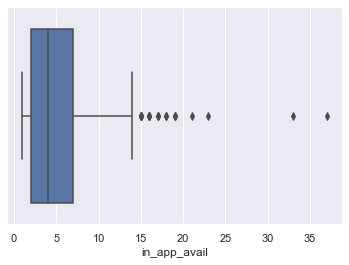

In [106]:
sns.boxplot(x=dfapp.in_app_avail)

In [108]:
#Create app meta data
app1 = pd.merge(app, dfapp, on = 'parent_app_content_id', how = 'left')
print(app1.shape)
app1.head()

(1000, 8)


,app_name,parent_app_content_id,category_id,app_device_id,category_name,app_device_name,consumable,in_app_avail
0,half-slouched having,22dfac9721b899cb,Y-8,3,Photos & Videos,Both,1,1.0
1,That Zoology,6473dd29a2badbf1,Y-8,3,Photos & Videos,Both,1,1.0
2,careful!--come stubbornly,ee013dcbf9ecc2b1,Y-8,3,Photos & Videos,Both,1,4.0
3,Bang background,1c85ae3c9505ff55,Y-8,3,Photos & Videos,Both,1,3.0
4,tides multitudinously,83f2675cd07166c3,Y-8,3,Photos & Videos,Both,1,2.0


In [109]:
app1.to_csv('app_detail.csv')